<a href="https://colab.research.google.com/github/yeonmi02/machine-learning-practice/blob/main/250528_rnn_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시퀀스 배열로 다루는 순환 신경망(RNN)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

### 라이브러리 불러오기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 불러오기 및 확인

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8982,) (2246,)
(8982,) (2246,)


In [4]:
category = np.max(y_train) + 1 # 0 ~ 45

print(f"카테고리 : {category}개")
print(f"학습용 뉴스 기사 : {len(X_train)}개")
print(f"테스트용 뉴스 기사 : {len(X_test)}개")
print(X_train[0])
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

카테고리 : 46개
학습용 뉴스 기사 : 8982개
테스트용 뉴스 기사 : 2246개
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
토큰 개수 ex : 87, 56, 139


### 텍스트 전처리

In [5]:
# Padding 적용
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
print(f"토큰 개수 ex : {len(X_train[0])}, {len(X_train[1])}, {len(X_train[2])}")

토큰 개수 ex : 100, 100, 100


In [6]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
# One hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
len(y_train[0])

46

### 모델 생성

확인문제 1 : 빈칸에 들어갈 값을 적으세요

In [10]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4020 - loss: 2.4904 - val_accuracy: 0.4969 - val_loss: 1.9961
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5310 - loss: 1.8343 - val_accuracy: 0.5922 - val_loss: 1.6606
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5946 - loss: 1.5855 - val_accuracy: 0.5944 - val_loss: 1.6806
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6218 - loss: 1.4720 - val_accuracy: 0.6371 - val_loss: 1.4488
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6644 - loss: 1.3153 - val_accuracy: 0.6558 - val_loss: 1.3558
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6991 - loss: 1.1986 - val_accuracy: 0.6705 - val_loss: 1.2580
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7248 - loss: 1.0852 - val_accuracy: 0.7004 - val_loss: 1.2040
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7430 - loss: 1.0150 - val_accu

### 성능 평가 및 시각화

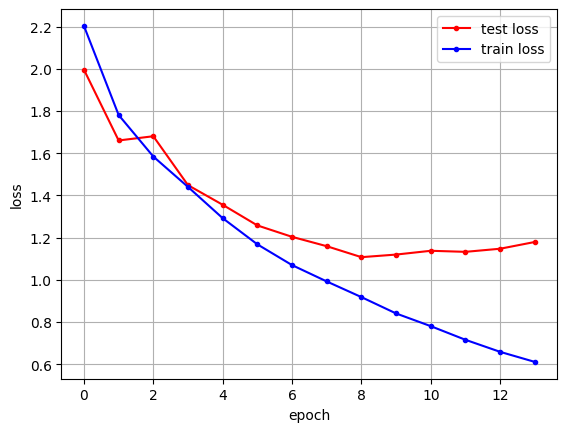

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

### 라이브러리 불러오기

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

### 데이터 불러오기 및 확인

In [13]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [15]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

218 189 141


In [16]:
unique, count = np.unique(y_train, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


In [17]:
unique, count = np.unique(y_test, return_counts=True)
print(unique, count)

[0 1] [12500 12500]


### 텍스트 전처리

In [18]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [19]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))

500 500 500


### 모델 생성

In [20]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7049 - loss: 0.5166 - val_accuracy: 0.8867 - val_loss: 0.2828
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9075 - loss: 0.2359 - val_accuracy: 0.8965 - val_loss: 0.2608
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9338 - loss: 0.1745 - val_accuracy: 0.8918 - val_loss: 0.2675
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9497 - loss: 0.1417 - val_accuracy: 0.8874 - val_loss: 0.3082
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9605 - loss: 0.1108 - val_accuracy: 0.8704 - val_loss: 0.3656
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8648 - loss: 0.3913
Test Accuracy:  0.8671


### 성능 평가 및 시각화

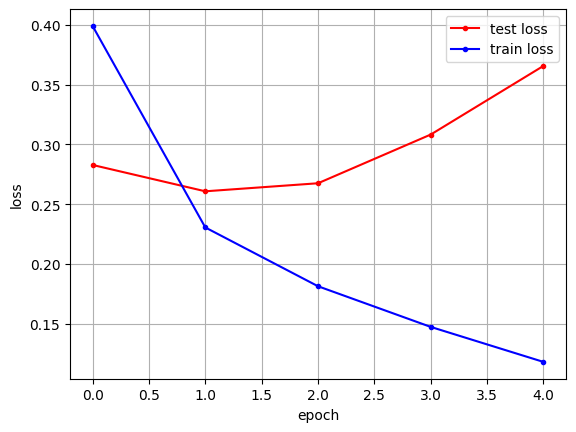

In [22]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='test loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 모델 수정 및 결과 비교
- 과적합이 발생한 이유에 대해 설명하세요
- Embedding Layer의 출력 벡터 수를 50으로 조정 후 결과를 비교해보세요

## 3. 어텐션을 사용한 신경망

In [23]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=3e523ca14068974f740f12bd03af870e4b13f22c1b976e008ec69b2e84d77021
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-self-attention


In [24]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from keras_self_attention import SeqSelfAttention

### 모델 생성

In [25]:
att_model = Sequential()
att_model.add(Embedding(5000, 500))
att_model.add(Dropout(0.5))
att_model.add(LSTM(64, return_sequences=True))
att_model.add(SeqSelfAttention(attention_activation='sigmoid'))
att_model.add(Dropout(0.5))
att_model.add(Flatten())
att_model.add(Dense(1))
att_model.add(Activation('sigmoid'))

### 모델 학습

In [27]:
att_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

att_history = att_model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f"Test Accuracy: {att_model.evaluate(X_test, y_test)[1] : .4f}")

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 159ms/step - accuracy: 0.9211 - loss: 0.2053 - val_accuracy: 0.8797 - val_loss: 0.2915
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 182ms/step - accuracy: 0.9465 - loss: 0.1468 - val_accuracy: 0.8908 - val_loss: 0.2834
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.9628 - loss: 0.1014 - val_accuracy: 0.8831 - val_loss: 0.3135
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.9752 - loss: 0.0722 - val_accuracy: 0.8794 - val_loss: 0.4369
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.9836 - loss: 0.0462 - val_accuracy: 0.8778 - val_loss: 0.4953
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8748 - loss: 0.5125
Test Accuracy:  0.8778


### 성능 평가 및 시각화

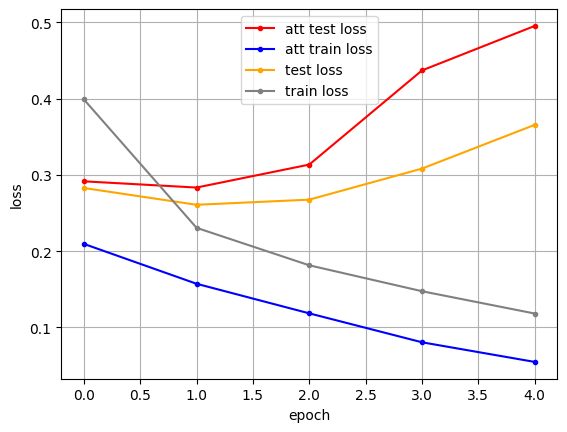

In [28]:
att_y_vloss = att_history.history['val_loss']
att_y_loss = att_history.history['loss']

x_len = np.arange(len(att_y_loss))
plt.plot(x_len, att_y_vloss, marker='.', c="red", label='att test loss')
plt.plot(x_len, att_y_loss, marker='.', c="blue", label='att train loss')
plt.plot(x_len, y_vloss[0:5], marker='.', c="orange", label='test loss')
plt.plot(x_len, y_loss[0:5], marker='.', c="gray", label='train loss')

plt.legend()
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 2 : LSTM + CNN 모델과 어텐션 모델의 결과를 비교하고 이유를 설명하세요